In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [2]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

C:\Users\yinahe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [3]:
decision_scores = log_reg.decision_function(X_test)

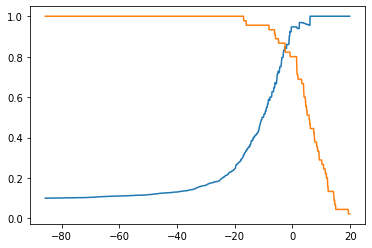

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

precision_scores = []
recall_scores = []

thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), step=0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precision_scores.append(precision_score(y_test, y_predict))
    recall_scores.append(recall_score(y_test, y_predict))

plt.plot(thresholds, precision_scores)
plt.plot(thresholds, recall_scores)
plt.show()

### precision-recall曲线

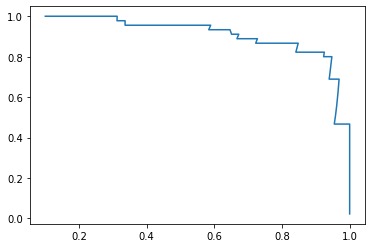

In [23]:
plt.plot(precision_scores, recall_scores)
plt.show()

### scikit-learn中的precision-recall曲线

In [16]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [17]:
precisions.shape

(145,)

In [19]:
recalls.shape

(145,)

In [20]:
thresholds.shape

(144,)

the last precision and recall values are 1. and 0. respectively and do not have a corresponding threshold.

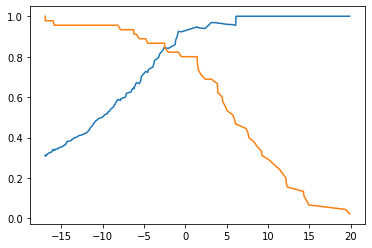

In [21]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()